In [1]:
import numpy as np
tab0=np.ones((30,30),dtype='uint8')*255

from skimage import io
io.imshow(tab0)

RuntimeError: No suitable plugin registered for imshow.

You may load I/O plugins with the `skimage.io.use_plugin` command.  A list of all available plugins are shown in the `skimage.io` docstring.

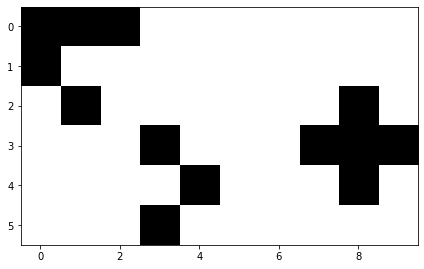

In [ ]:
depart=np.array([[0,0,0,255,255,255,255,255,255,255],
                 [0,255,255,255,255,255,255,255,255,255],
                 [255,0,255,255,255,255,255,255,0,255],
                 [255,255,255,0,255,255,255,0,0,0],
                 [255,255,255,255,0,255,255,255,0,255],
                 [255,255,255,0,255,255,255,255,255,255]],dtype='uint8')
from skimage import io
io.imshow(depart,cmap='gray')

In [ ]:
w1 = (tab0.shape[0] - depart.shape[0]) // 2
w2 = w1 + depart.shape[0]
h1 = (tab0.shape[1] - depart.shape[1]) // 2
h2 = h1 + depart.shape[1]

tab0[w1:w2,h1:h2] = depart
tab0 = np.array(tab0)

In [ ]:
def voisin(tpl, tab):
    returning = []
    if tpl[0] > 0:
        if tab[tpl[0]-1][tpl[1]] == 0:
            returning.append((tpl[0]-1, tpl[1])) #haut
    if tpl[0] <= tab.shape[0] - 2:
        if tab[tpl[0]+1][tpl[1]] == 0:
            returning.append((tpl[0]+1, tpl[1])) #bas
    if tpl[1] > 0:
        if tab[tpl[0]][tpl[1]-1] == 0:
            returning.append((tpl[0], tpl[1]-1)) #gauche
    if tpl[1] <= tab.shape[1] - 2:
        if tab[tpl[0]][tpl[1]+1] == 0:
            returning.append((tpl[0], tpl[1]+1)) #droite

    if tpl[0] > 0 and tpl[1] > 0:
        if tab[tpl[0]-1][tpl[1]-1] == 0:
            returning.append((tpl[0]-1, tpl[1]-1)) #diagonalde haut gauche
    if tpl[0] <= tab.shape[0] - 2 and tpl[1] > 0:
        if tab[tpl[0]+1][tpl[1]-1] == 0:
            returning.append((tpl[0]+1, tpl[1]-1)) #diagonalde bas gauche
    if tpl[0] > 0 and tpl[1] <= tab.shape[1] - 2:
        if tab[tpl[0]-1][tpl[1]+1] == 0:
            returning.append((tpl[0]-1, tpl[1]+1)) #diagonalde haut droit
    if tpl[0] <= tab.shape[0] - 2 and tpl[1] <= tab.shape[1] - 2:
        if tab[tpl[0]+1][tpl[1]+1] == 0:
            returning.append((tpl[0]+1, tpl[1]+1)) #diagonalde bas droite

    return returning
# voisin((15,18), tab0)

In [ ]:
def nombre(tpl, tab):
    return len(voisin(tpl, tab))
# nombre((15,18), tab0)

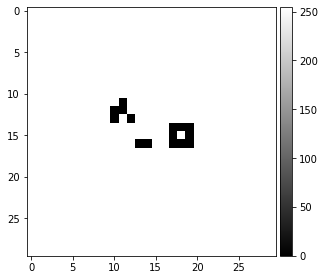

In [ ]:
def iteration(tab):
    newtab = np.array(tab.tolist())
    for y in range(len(tab)):
        for x in range(len(tab[y])):
            alive = tab[y][x] == 0
            nb = nombre((y, x), tab)
            if alive:
                if nb == 2 or nb == 3:
                    newtab[y][x] = 0
                else:
                    newtab[y][x] = 255
            elif not alive:
                if nb == 3:
                    newtab[y][x] = 0
    return newtab
io.imshow(iteration(tab0),cmap='gray') #1er iteration


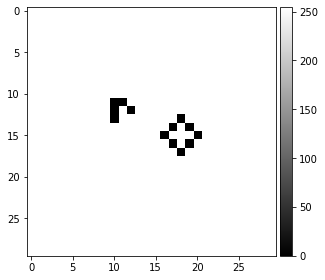

In [ ]:
io.imshow(iteration(iteration(tab0)),cmap='gray')

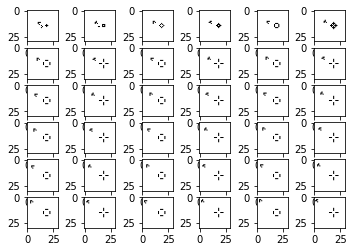

In [ ]:
import matplotlib.pyplot as plt

rows = 6
cols = 6
fig=plt.figure()

for a in range(36):
    b = tab0
    tab0 = iteration(tab0)
    fig.add_subplot(rows, cols, a+1)
    plt.imshow(b, cmap="gray")
plt.show()